# Datasets
- [Pittsburgh Traffic Count](https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh)
- [Allegheny Country Crash Data](https://data.wprdc.org/dataset/allegheny-county-crash-data)

## Overview

Traffic counters are used to determine the speed of each car passing by the counter on the road. This data contains that information for most areas of
Pittsburgh.

# Metrics

One metric I plan to use **percent over the limit**, that is, the % of cars above the speed limit. This will be an important metric determining safety of an area.
Another metric can be, **average speed exceeding the limit**,  that is, when people speed, on average how much higher than the normal speed limit do drivers go.

In [11]:
import os
import pandas as pd

# All the CSV files live in the data folder.
DATA_DIR = "data/"

# Automatically load every CSV file in the DATA_DIR into a dictionary.
# The return result is a dict where they keys are the filename without the
# extension, and the values are `DataFrame`s.
def load_all_csv():
    return {f.split(".")[0] : pd.read_csv(DATA_DIR + f) for f in os.listdir(DATA_DIR) if f.split(".")[1] == "csv"}

# Load all the CSV datasets at once.
datasets = load_all_csv()

/Users/aaronsutton/.anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (77,78,79,80,81,82,83,84,183,189) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


With the code above, all you need to do is drop the relevant CSV into `data/` and it will be loaded
automatically. Dataset access can now be done using the dataset dictionary.

For example, if I wanted to get the crash dataset:
```python
datasets["crash"]
```
Or if you added `covid.csv` to `data/`:
```python
datasets["covid"]
```

If we need formats other than CSV, we can either modify the function or just load the file(s) directly.

# Analysis

## Average Median Speed by Neighborhood

First, we'll aggregate the speed count data to form an approximate average speed for every recorded neighborhood in Pittsburgh.

<AxesSubplot:xlabel='neighborhood'>

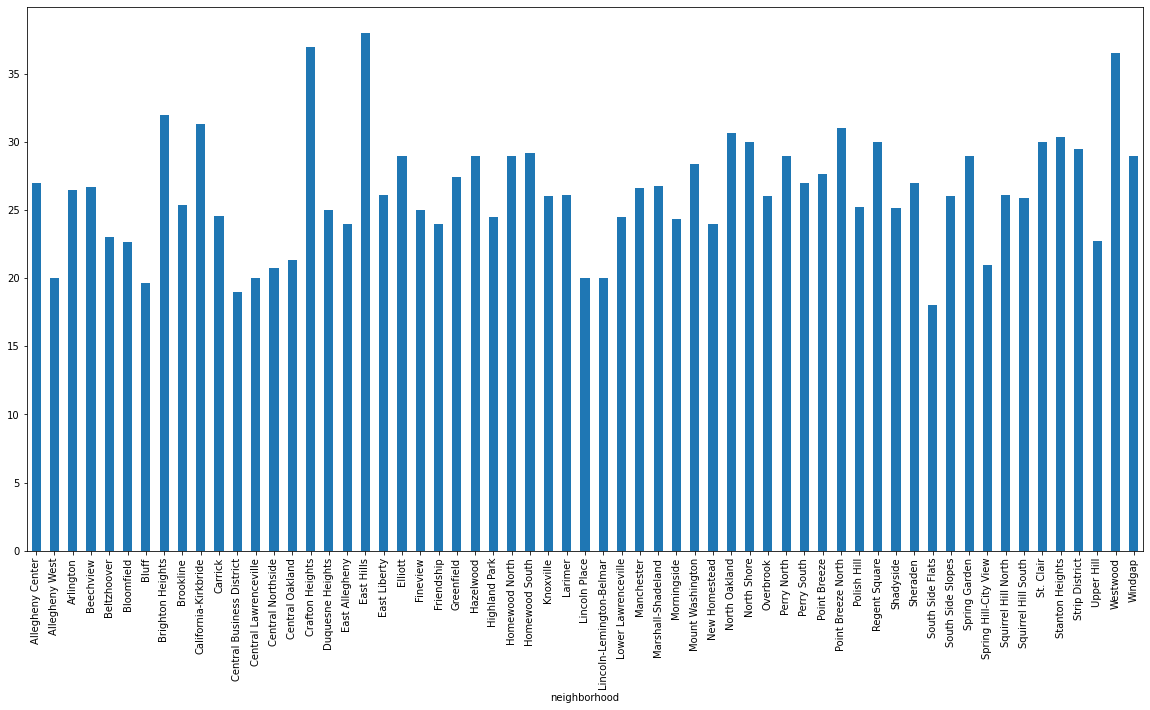

In [12]:
df = datasets["traffic"]
(df.groupby(['neighborhood', 'median_speed'], as_index=False).mean().groupby('neighborhood')['median_speed'].mean()).plot.bar(figsize=(20,10))

<AxesSubplot:xlabel='neighborhood'>

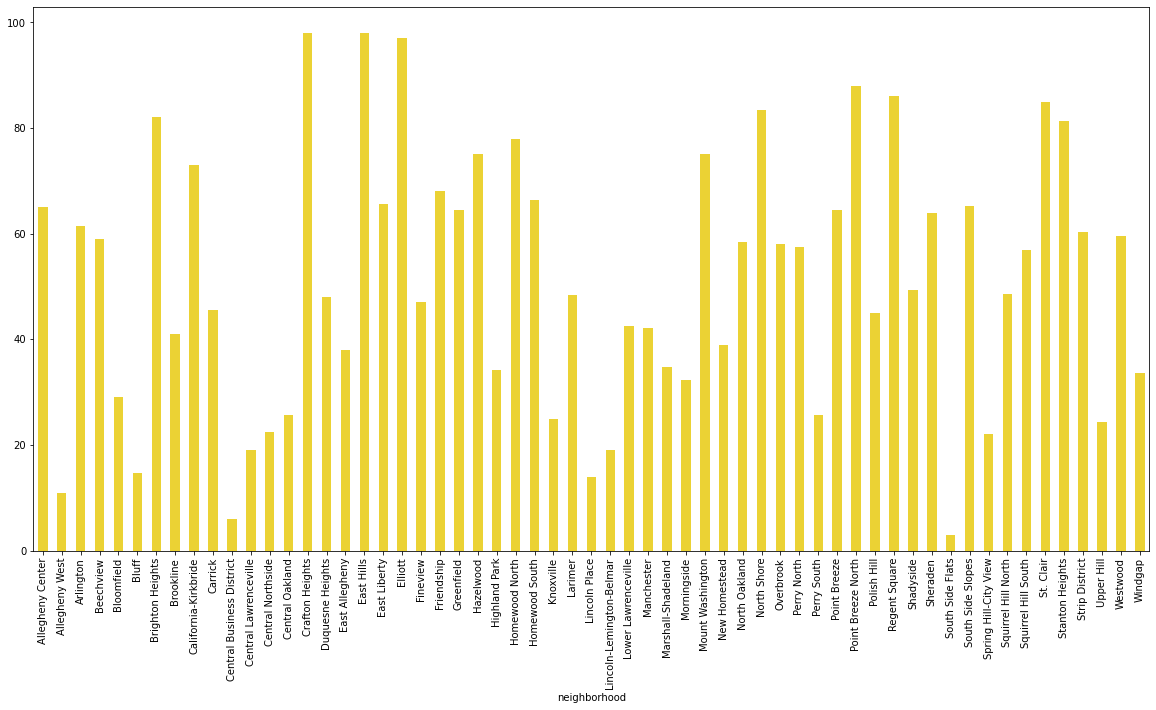

In [15]:
df = datasets["traffic"]
(df.groupby(['neighborhood', 'percent_over_limit'], as_index=False).mean().groupby('neighborhood')['percent_over_limit'].mean()).plot.bar(color="#ebd234", figsize=(20,10))


<AxesSubplot:xlabel='neighborhood'>

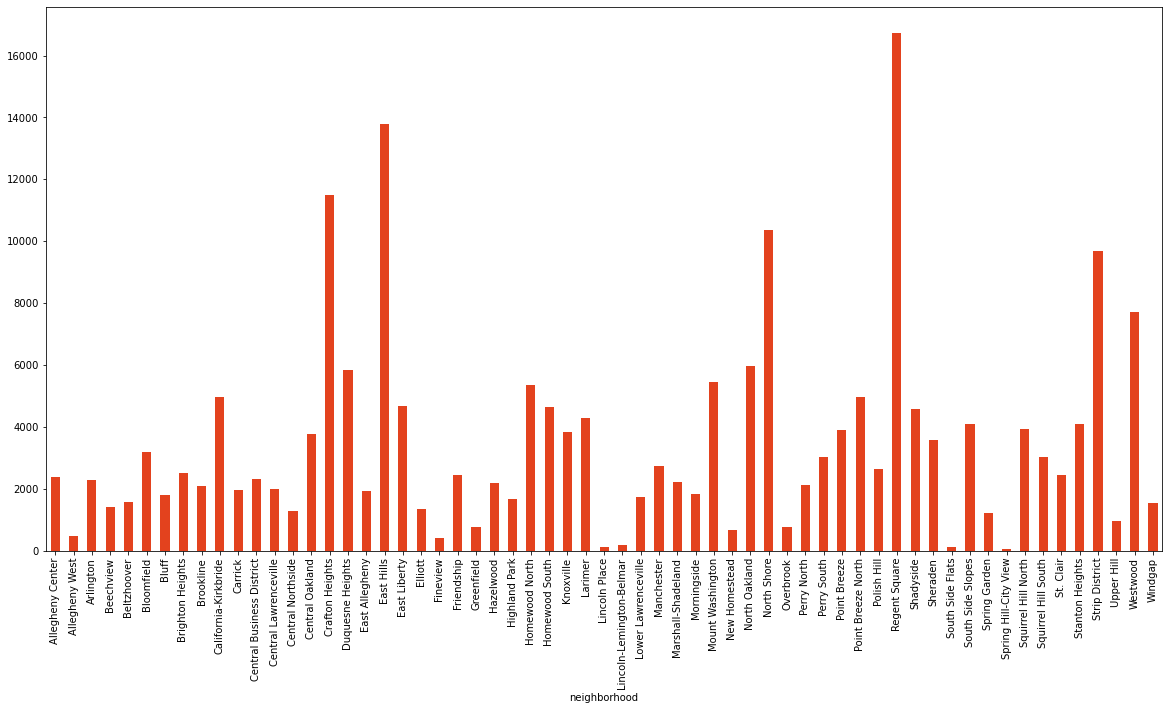

In [16]:
df = datasets["traffic"]
(df.groupby(['neighborhood', 'average_daily_car_traffic'], as_index=False).mean().groupby('neighborhood')['average_daily_car_traffic'].mean()).plot.bar(color="#e3421e", figsize=(20,10))